### **Assignment-2**
Submitted by : 
- Nikhil Shankar C S
- 9026254

In [3]:
#!/usr/bin/python3
import time
import gym
from Agent import Agent
#---------------------------
# Helper functions
#---------------------------

'''@brief Describes the environment actions, observation states, and reward range
'''
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.n
    reward_range = env.reward_range
    action_desc = { 
        0: "Move south (down)",
        1: "Move north (up)",
        2: "Move east (right)",
        3: "Move west (left)",
        4: "Pickup passenger",
        5: "Drop off passenger"
    }
    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Reward Range: ", reward_range)
    
    print("Number of actions: ", num_actions)
    print("Action description: ", action_desc)
    return num_obs, num_actions


'''@brief Get the string description of the action
'''
def get_action_description(action):
    action_desc = { 
        0: "Move south (down)",
        1: "Move north (up)",
        2: "Move east (right)",
        3: "Move west (left)",
        4: "Pickup passenger",
        5: "Drop off passenger"
    }
    return action_desc[action]

'''@brief print full description of current observation
'''
def describe_obs(obs):
    obs_desc = {
        0: "Red",
        1: "Green",
        2: "Yellow",
        3: "Blue",
        4: "In taxi"
    }
    obs_dict = breakdown_obs(obs)
    print("Passenger is at: {0}, wants to go to {1}. Taxi currently at ({2}, {3})".format(
        obs_desc[obs_dict["passenger_location"]], 
        obs_desc[obs_dict["destination"]], 
        obs_dict["taxi_row"], 
        obs_dict["taxi_col"]))

'''@brief Takes an observation for the 'taxi-v3' environment and returns details observation space description
    @details returns a dict with "destination", "passenger_location", "taxi_col", "taxi_row"
    @see: https://gymnasium.farama.org/environments/toy_text/taxi/
'''
def breakdown_obs(obs):
    # ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination = X
    # X % 4 --> destination
    destination = obs % 4
    # X -= remainder, X /= 4
    obs -= destination
    obs /= 4
    # X % 5 --> passenger_location
    passenger_location = obs % 5
    # X -= remainder, X /= 5
    obs -= passenger_location
    obs /= 5
    # X % 5 --> taxi_col
    taxi_col = obs % 5
    # X -= remainder, X /=5 
    obs -= taxi_col
    # X --> taxi_row
    taxi_row = obs
    observation_dict= {
        "destination": destination, 
        "passenger_location": passenger_location,
        "taxi_row": taxi_row, 
        "taxi_col": taxi_col
    }
    return observation_dict


'''@brief simulate the environment with the agents taught policy
'''
def simulate_episodes(env, agent, num_episodes=3, should_display=True):
    allEpisodeRewards = 0
    allEpisodeSteps = 0
    allEpisodeDone = 0
    for i in range(num_episodes):
        done = False
        state, _ = env.reset()
        describe_obs(state)
        env.render()
        totalReward = 0
        totalSteps = 0
        while not done and totalSteps < 100:
            # Random choice from behavior policy
            action = agent.select_action(state)
            # take a step
            if should_display:
                print(env.render())
            time.sleep(0.1)
            next_state, reward, done, _, _ = env.step(action)
            if done:
                allEpisodeDone+=1
            totalReward+=reward
            totalSteps+=1
            state = next_state
        time.sleep(1.0)
        print(f"Episode Reward : {totalReward} Episode Steps : {totalSteps}")
        allEpisodeRewards += totalReward
        allEpisodeSteps += totalSteps
    print(f"Total Reward : {allEpisodeRewards} Total Steps : {allEpisodeSteps} TotalCompleted: {allEpisodeDone}")
    return allEpisodeRewards, allEpisodeSteps, allEpisodeDone, num_episodes

def train_and_simulate(learning_rate=0.1, discount_factor=0.9, epsilon=0.1, episodes=5000):
    # learning_rate is denoted by alpha
    # discount_factor is denoted by gamma
    # Note: Use v3 for the latest version
    env = gym.make('Taxi-v3')
    num_obs, num_actions = describe_env(env)
    

    # TODO: Train
    agent = Agent(num_obs, num_actions, alpha=learning_rate, gamma=discount_factor, epsilon=epsilon)
    agent.train(env, episodes)

    #print(f"States : {num_obs} Actions {num_actions}")
    #agent = Agent(num_states=num_obs, num_actions=num_actions)
    #simulate_episodes(env, agent, 100)
    
    # TODO: Simulate
    # Note how here, we change the render mode for testing/simulation
    env2 = gym.make('Taxi-v3', render_mode="ansi")
    simulate_episodes(env2, agent)




#### **Training and Simulating Trial**

> We have defined the Agent in Agent.py

In the above code ```train_and_simulate``` function can be called for running the taxi training and simulation.

In [5]:
train_and_simulate()

Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}


c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Passenger is at: Red, wants to go to Green. Taxi currently at (5.0, 4.0)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


#### **Analysis**

- The training was done for 5000 episodes.
- The learning rate was 0.1, discount factor was 0.9 and epsilon was 0.1
- We can see that after training the agent is able to solve the problem efficiently.

#### **Comparing different hyper parameters**

- So we need to try 4 different learning rates and 3 different exploration factors.
- To understand about the influence of discount factor we are using two discount factors as well.
- So in total we will try 3 * 4 * 2 ( 24 ) different models and evaluate them based on the Total Steps and Total Rewards, Average Rewards, Average Steps and Training Time during simulation after training.
- In order to do the evaluation correctly we need to make sure that the evaluation happens for a good amount of iterations. So we would simulate around 50 episodes for each model after training and take average of the rewards and steps taken to evaluate the model performance.

In [ ]:
import itertools
import pandas as pd

def evaluate_hyperparameters(episodes=5000, evaluation_episodes = 50):
    # learning_rate is denoted by alpha
    # discount_factor is denoted by gamma
    # Note: Use v3 for the latest version
    env = gym.make('Taxi-v3')
    num_obs, num_actions = describe_env(env)
    
    learning_rate = [0.1, 0.01, 0.001, 0.2]
    exploration_factor = [0.1, 0.2, 0.3]
    discount_factor = [0.9, 0.8]

    # TODO: Train
    evaluation_results = []
    for alpha, epsilon, discount in itertools.product(learning_rate, exploration_factor, discount_factor):
        print(f"\n\n----------------------------------------------------------------------------------------")
        print(f"Training for LearningRate : {alpha} Exploration Factor : {epsilon} Discount Factor :{discount}")
        agent = Agent(num_obs, num_actions, alpha=alpha, gamma=discount, epsilon=epsilon)
        startTime = time.time()
        agent.train(env, episodes)
        training_time = time.time() - startTime
        env2 = gym.make('Taxi-v3', render_mode="ansi")
        totalRewards, totalSteps, totalCompleted, totalEpisodes = simulate_episodes(env2, agent, evaluation_episodes, should_display=False)
        avgRewards = totalRewards/totalEpisodes
        avgSteps = totalSteps/totalEpisodes
        evaluation_results.append([alpha, epsilon, discount, training_time, totalRewards, totalSteps, totalCompleted, avgRewards, avgSteps, totalEpisodes])
        print(f"Evaluation Completed with TotalReward : {totalRewards} TotalSteps : {totalSteps} TotalDone : {totalCompleted}")
        print(f"Evaluation Completed for LearningRate : {alpha} Exploration Factor : {epsilon} Discount Factor : {discount}")
        print(f"----------------------------------------------------------------------------------------\n\n")

    df = pd.DataFrame(evaluation_results, columns=["LearningRate", "ExplorationFactor", "DiscountFactor", "TrainingTime", "TotalRewards", "TotalSteps", "TotalCompleted", "AvgRewards", "AvgSteps", "TotalEpisodes"])
    return df

In [4]:
result_df = evaluate_hyperparameters(evaluation_episodes=50)
display(result_df)


Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}


----------------------------------------------------------------------------------------
Training for LearningRate : 0.1 Exploration Factor : 0.1 Discount Factor :0.9


c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Passenger is at: Green, wants to go to Yellow. Taxi currently at (15.0, 2.0)
Episode Reward : -7 Episode Steps : 19
Passenger is at: Green, wants to go to Yellow. Taxi currently at (10.0, 1.0)
Episode Reward : 5 Episode Steps : 16
Passenger is at: Green, wants to go to Blue. Taxi currently at (10.0, 2.0)
Episode Reward : 10 Episode Steps : 11
Passenger is at: Blue, wants to go to Red. Taxi currently at (20.0, 4.0)
Episode Reward : -11 Episode Steps : 14
Passenger is at: Blue, wants to go to Green. Taxi currently at (5.0, 3.0)
Episode Reward : 11 Episode Steps : 10
Passenger is at: Green, wants to go to Yellow. Taxi currently at (0.0, 0.0)
Episode Reward : -7 Episode Steps : 19
Passenger is at: Yellow, wants to go to Green. Taxi currently at (15.0, 3.0)
Episode Reward : 3 Episode Steps : 18
Passenger is at: Blue, wants to go to Red. Taxi currently at (15.0, 1.0)
Episode Reward : 5 Episode Steps : 16
Passenger is at: Green, wants to go to Blue. Taxi currently at (0.0, 3.0)
Episode Reward

,LearningRate,ExplorationFactor,DiscountFactor,TrainingTime,TotalRewards,TotalSteps,TotalCompleted,AvgRewards,AvgSteps,TotalEpisodes
0,0.100,0.1,0.9,3.819271,56,742,50,1.12,14.84,50
1,0.100,0.1,0.8,4.961675,153,726,50,3.06,14.52,50
2,0.100,0.2,0.9,4.555006,-380,845,50,-7.60,16.90,50
3,0.100,0.2,0.8,5.805219,-177,831,50,-3.54,16.62,50
4,0.100,0.3,0.9,5.651855,-786,1008,50,-15.72,20.16,50
5,0.100,0.3,0.8,5.311195,-749,980,50,-14.98,19.60,50
6,0.010,0.1,0.9,18.420569,-4862,4046,13,-97.24,80.92,50
7,0.010,0.1,0.8,20.241182,-5573,4421,9,-111.46,88.42,50
8,0.010,0.2,0.9,19.010518,-4509,3303,24,-90.18,66.06,50
9,0.010,0.2,0.8,19.059205,-5727,3741,19,-114.54,74.82,50


#### **Best Model based on Average Steps**

In [5]:
import pandas as pd
best_model_df = pd.read_csv("training_results.csv")  
max_row = best_model_df.loc[best_model_df["AvgSteps"].idxmin()]  # Replace with your column name
display(max_row)


LearningRate           0.200000
ExplorationFactor      0.100000
DiscountFactor         0.800000
TrainingTime           4.340058
TotalRewards         187.000000
TotalSteps           701.000000
TotalCompleted        50.000000
AvgRewards             3.740000
AvgSteps              14.020000
TotalEpisodes         50.000000
Name: 19, dtype: float64

- We see that the model with **LR = 0.2 | EF = 0.1 and DF = 0.8** gave the best results.

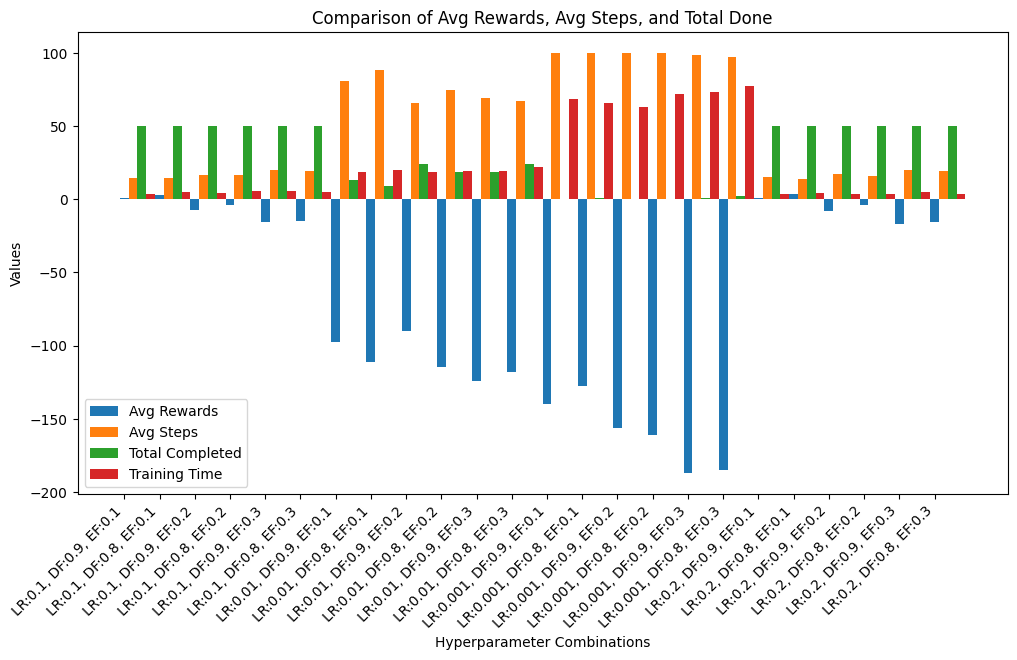

In [10]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
# Unique combinations
df = result_df.copy()
df["params"] = df.apply(lambda row: f"LR:{row.LearningRate}, DF:{row.DiscountFactor}, EF:{row.ExplorationFactor}", axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
x = np.arange(len(df))
width = 0.25

ax.bar(x, df["AvgRewards"], width, label="Avg Rewards")
ax.bar(x+width, df["AvgSteps"], width, label="Avg Steps")
ax.bar(x + width + width, df["TotalCompleted"], width, label="Total Completed")
ax.bar(x + width + width + width, df["TrainingTime"], width, label="Training Time")
# Labels
ax.set_xlabel("Hyperparameter Combinations")
ax.set_ylabel("Values")
ax.set_title("Comparison of Avg Rewards, Avg Steps, and Total Done")
ax.set_xticks(x)
ax.set_xticklabels(df["params"], rotation=45, ha="right")
ax.legend()

plt.show()

- Note that from the above graph it is evident that as learnig rate went below 0.1 it was exhibiting worse results in terms of rewards and average steps taken.
- We can also see that the number of Completed steps (green bar) were really low while for LR 0.1 and 0.2 all episodes reached a completed state.

#### **Comparing Learning Rate 0.1 and 0.2**

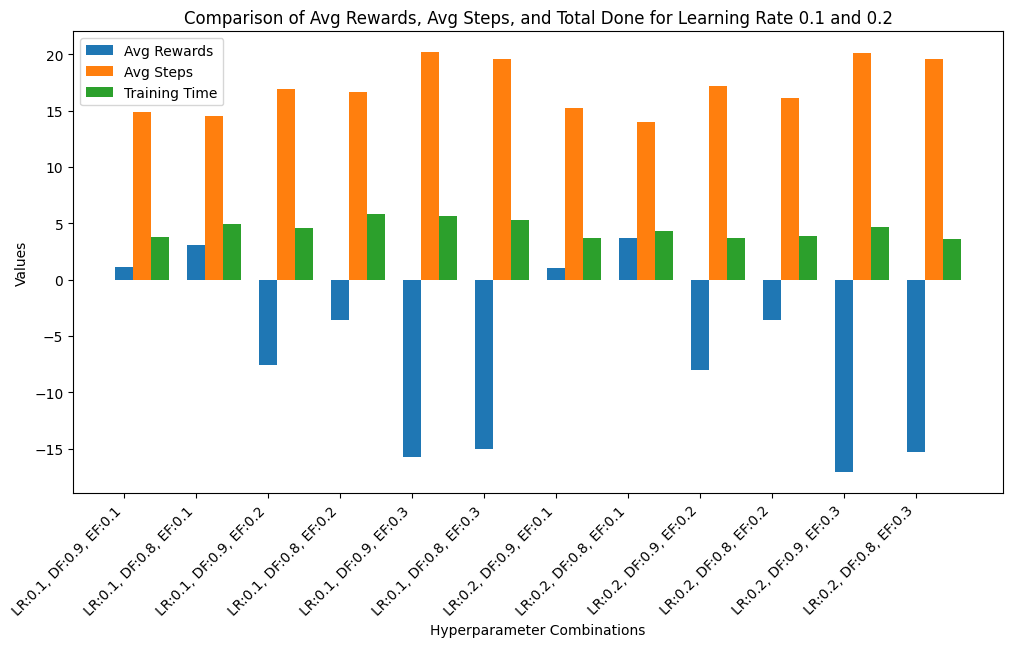

In [12]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
# Unique combinations
df = result_df.copy()
df = df[df["LearningRate"].isin([0.1,0.2])]
df["params"] = df.apply(lambda row: f"LR:{row.LearningRate}, DF:{row.DiscountFactor}, EF:{row.ExplorationFactor}", axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
x = np.arange(len(df))
width = 0.25

ax.bar(x, df["AvgRewards"], width, label="Avg Rewards")
ax.bar(x+width, df["AvgSteps"], width, label="Avg Steps")
ax.bar(x + width + width, df["TrainingTime"], width, label="Training Time")
# Labels
ax.set_xlabel("Hyperparameter Combinations")
ax.set_ylabel("Values")
ax.set_title("Comparison of Avg Rewards, Avg Steps, and Total Done for Learning Rate 0.1 and 0.2")
ax.set_xticks(x)
ax.set_xticklabels(df["params"], rotation=45, ha="right")
ax.legend()

plt.show()

In [13]:
result_df.to_csv("training_results.csv", index=False)


#### **Some Insights**

- Learning rate has a sweet spot for all problems. Meaning very low learning rate and very large learning rate can be decremental in finding the optimal solution due to missing local minimums or getting stuck in local minimum respectively.
- We can see that as the Learning rate was lowered below 0.1 to 0.01 and then to 0.001 the results kept becoming worse as shown by the negative axis blue lines in the first graph.
- From the table and graph above we can see that both **Learning rates 0.1 and 0.2** gives very good results. Both were able to solve the problem in identical average reward and average steps. 
-  We can also see that training time is slightly less for learning rate 0.2.
- We can also see that average steps and average rewards are better when we have lower exploration factor. ie for same learning rate and discount factor keeping the exploration factor low gave us better results. 
- We can also see that discount factor when it is lowered from 0.9 to 0.8 it performs worse on average steps taken which means increasing the discount factor is better for solving the problem in minimum number of steps. Also a lower discount rate requires more time to train the model.
- We can also see that as **Exploration Factor is increased** rewards were going down and **average steps taken were increasing**. So keeping Exploration factor low ie 0.1 is better for the problem.
- To Summarize if we give prime importance to average steps taken which aligns with a realworld taxi problem we should select the following hyper parameters.
- **Learning Rate : 0.2  | Discount Factor : 0.8 | Exploration Factor : 0.1** = **Avg Steps = 14.02** gave the best result in terms of average steps taken.

#### **Final Stage**

- We have experimented with 3 different hyper parameters and we have one more hyper parameter we can test the best model against which is the **number of episodes** used for training. 
- The above results were for 5000 episode training.
- Now we will try with **250, 2000, 5000 & 10000** training episode respectively and compare the results.

In [4]:
import itertools
import pandas as pd

def final_run(evaluation_episodes = 50):
    # learning_rate is denoted by alpha
    # discount_factor is denoted by gamma
    # Note: Use v3 for the latest version
    env = gym.make('Taxi-v3')
    num_obs, num_actions = describe_env(env)
    
    episodes = [250, 2000, 5000, 10000]
    exploration_factor = [0.1]
    discount_factor = [0.8]
    learning_rate = [0.2]

    # TODO: Train
    evaluation_results = []
    for episode, alpha, epsilon, discount in itertools.product(episodes, learning_rate, exploration_factor, discount_factor):
        print(f"\n\n----------------------------------------------------------------------------------------")
        print(f"Training for Episodes {episode} LearningRate : {alpha} Exploration Factor : {epsilon} Discount Factor :{discount}")
        agent = Agent(num_obs, num_actions, alpha=alpha, gamma=discount, epsilon=epsilon)
        startTime = time.time()
        agent.train(env, episode)
        training_time = time.time() - startTime
        env2 = gym.make('Taxi-v3', render_mode="ansi")
        totalRewards, totalSteps, totalCompleted, totalEpisodes = simulate_episodes(env2, agent, evaluation_episodes, should_display=False)
        avgRewards = totalRewards/totalEpisodes
        avgSteps = totalSteps/totalEpisodes
        evaluation_results.append([episode, alpha, epsilon, discount, training_time, totalRewards, totalSteps, totalCompleted, avgRewards, avgSteps, totalEpisodes])
        print(f"Evaluation Completed with TotalReward : {totalRewards} TotalSteps : {totalSteps} TotalDone : {totalCompleted}")
        print(f"Evaluation Completed for Episodes : {episode} LearningRate : {alpha} Exploration Factor : {epsilon} Discount Factor : {discount}")
        print(f"----------------------------------------------------------------------------------------\n\n")

    df = pd.DataFrame(evaluation_results, columns=["Episode", "LearningRate", "ExplorationFactor", "DiscountFactor", "TrainingTime", "TotalRewards", "TotalSteps", "TotalCompleted", "AvgRewards", "AvgSteps", "TotalEpisodes"])
    return df

In [5]:
final_result_df = final_run()

Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}


----------------------------------------------------------------------------------------
Training for Episodes 250 LearningRate : 0.2 Exploration Factor : 0.1 Discount Factor :0.8


c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Passenger is at: Blue, wants to go to Red. Taxi currently at (10.0, 4.0)
Episode Reward : 4 Episode Steps : 17
Passenger is at: Yellow, wants to go to Green. Taxi currently at (10.0, 1.0)
Episode Reward : -136 Episode Steps : 100
Passenger is at: Green, wants to go to Red. Taxi currently at (10.0, 0.0)
Episode Reward : -127 Episode Steps : 100
Passenger is at: Blue, wants to go to Green. Taxi currently at (0.0, 3.0)
Episode Reward : -145 Episode Steps : 100
Passenger is at: Yellow, wants to go to Blue. Taxi currently at (20.0, 2.0)
Episode Reward : -118 Episode Steps : 100
Passenger is at: Yellow, wants to go to Blue. Taxi currently at (10.0, 4.0)
Episode Reward : -136 Episode Steps : 100
Passenger is at: Blue, wants to go to Yellow. Taxi currently at (20.0, 0.0)
Episode Reward : -109 Episode Steps : 100
Passenger is at: Red, wants to go to Blue. Taxi currently at (15.0, 3.0)
Episode Reward : -136 Episode Steps : 100
Passenger is at: Green, wants to go to Red. Taxi currently at (15.0, 

In [6]:
final_result_df.to_csv("final_training_results.csv", index=False)


In [8]:
display(final_result_df)

,Episode,LearningRate,ExplorationFactor,DiscountFactor,TrainingTime,TotalRewards,TotalSteps,TotalCompleted,AvgRewards,AvgSteps,TotalEpisodes
0,250,0.2,0.1,0.8,1.102515,-5641,4402,7,-112.82,88.04,50
1,2000,0.2,0.1,0.8,1.796368,120,741,50,2.40,14.82,50
2,5000,0.2,0.1,0.8,3.445891,98,745,50,1.96,14.90,50
3,10000,0.2,0.1,0.8,4.294577,97,755,50,1.94,15.10,50


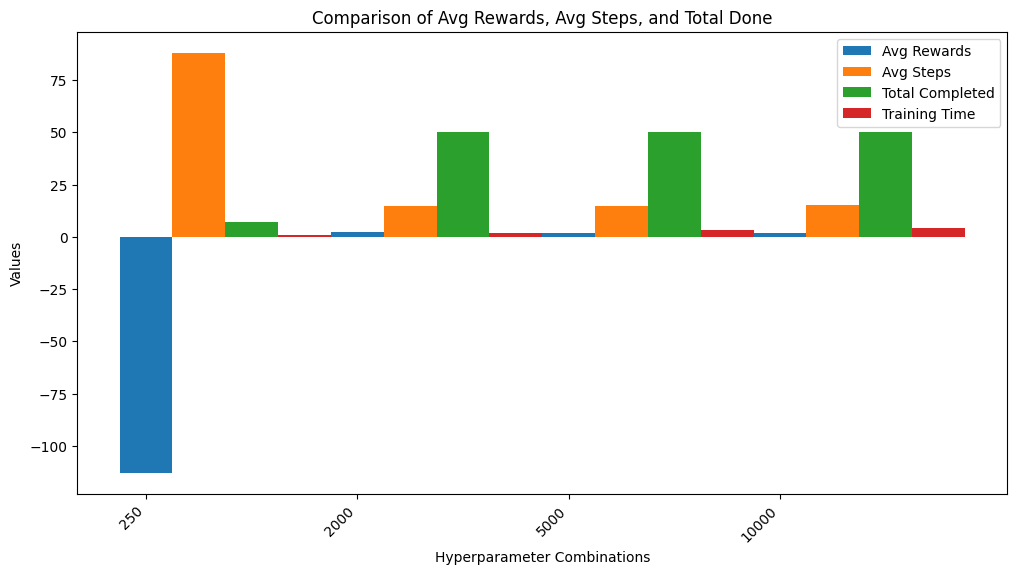

In [7]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
# Unique combinations
df = final_result_df.copy()
#df["params"] = df.apply(lambda row: f"LR:{row.LearningRate}, DF:{row.DiscountFactor}, EF:{row.ExplorationFactor}", axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
x = np.arange(len(df))
width = 0.25

ax.bar(x, df["AvgRewards"], width, label="Avg Rewards")
ax.bar(x+width, df["AvgSteps"], width, label="Avg Steps")
ax.bar(x + width + width, df["TotalCompleted"], width, label="Total Completed")
ax.bar(x + width + width + width, df["TrainingTime"], width, label="Training Time")
# Labels
ax.set_xlabel("Hyperparameter Combinations")
ax.set_ylabel("Values")
ax.set_title("Comparison of Avg Rewards, Avg Steps, and Total Done")
ax.set_xticks(x)
ax.set_xticklabels(df["Episode"], rotation=45, ha="right")
ax.legend()

plt.show()

#### **Conclusion**

- With various amount of training episode values we have found some interesting insights again.
- Its not necessary as we train the model more we find a better solution.
- Specifically in our case 250 training sessions proved useless because only 7 out of 50 completed the task. However the interesting thing is that  2000 training episode gave the best result as opposed to 5000 and 10000 training episodes.
- It means that an optimal training episode is somewhere between 250 - 2000.

- The average steps taken for the best model is : 14.82 steps and average reward is ~2.4 and training time is : 1.1 seconds.

#### **References** 

- - https://medium.com/@alwinraju/in-depth-guide-to-implementing-q-learning-in-python-with-openai-gyms-taxi-environment-cd356cc6a288

**Adding the Agent.py file for reference here.**
```
import numpy as np
import random

class Agent:
    def __init__(self, num_states, num_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate

        # Initialize Q-table
        self.q_table = np.zeros((num_states, num_actions))

    def select_action(self, state):
        """Epsilon-greedy action selection"""
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.num_actions - 1)  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit best known action

    def train(self, env, episodes=5000):
        """Train the agent using Q-learning"""
        for episode in range(episodes):
            state, _ = env.reset()
            done = False

            while not done:
                action = self.select_action(state)
                next_state, reward, done, _, _ = env.step(action)

                # Update Q-table using Bellman Equation
                self.q_table[state, action] = (1 - self.alpha) * self.q_table[state, action] + \
                                              self.alpha * (reward + self.gamma * np.max(self.q_table[next_state]))

                state = next_state
```